# Εργασία: Απειρόβαθο τετραγωνικό πηγάδι, με Python

**Μάθημα**: Προβλήματα Κβαντικής Φυσικής

**Εξεταστική Ιουνίου 2025**

**Ημέρα εξέτασης: 17/6/2025**

**Εργασία τελικής εξέτασης**:
Να αποσταλλεί το συμπληρωμένο αρχείο την παραμονή της εξέτασης, 16/6/2025 μέχρι τις 12 το μεσημέρι, στα email thdiakonidis@auth.gr, istergak@auth.gr 

Σε περίπτωση που εφαρμόσετε όλα τα αποτελέσματά σας σε μια κλάση έχετε bonus μια μονάδα.

Σε αυτή την εργασία θα μελετήσουμε το άπειρο τετραγωνικό φρέαρ (Infinite Square Well) μέσω της Python. Κάθε ερώτηση να συνοδεύεται από κώδικα και φυσική ερμηνεία των αποτελεσμάτων. 

Ξεκινήστε συμπληρώνoντας τις ιδιοτιμές και τις ιδιοσυναρτήσεις (βλ. αντίστοιχο μάθημα και βιβλίο Zettili). Με βάση το πεδίο ορισμού (πλέγμα τιμών) που σας δίδεται. Θεωρείστε ότι $\hbar = m =L=1$

Είναι: $$\psi_{n}=\sqrt\frac{2}{L}\sin(\frac{n \pi x}{L}) \quad και \quad E_{n}=\frac{\hbar^{2}\pi^{2}}{2m^{2}L^{2}}n^{2}$$

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

%matplotlib inline
#hbar and m are defined for clarity
hbar=1
m=1
L = 1.0
N = 1000
x = np.linspace(0, L, N)

def psi_n(n, x, L=1): #Eigenfunctions
    return np.sqrt(2/L)*np.sin(n*np.pi/L*x)

def E_n(n, L=1): #Eigenenergies
    return hbar**2*(np.pi)**2/(2*m*L**2)*n**2 

## Ερώτηση 1: Ιδιοκαταστάσεις και Ιδιοτιμές
Λαμβάνοντας υπόψη τα αποτελέσματα της λύσης της χρονικά ανεξάρτητης εξίσωσης Schrodinger για το Απειρόβαθο τετραγωνικό Πηγάδι (βλ. αντίστοιχη άσκηση).
Να γίνουν τα ακόλουθα:

**(α)** Υπολογισμός και σχεδίαση των πρώτων 3 ιδιοκαταστάσεων στο ίδιο γράφημα.

**(β)** Υπολογισμός των αντίστοιχων ιδιοτιμών ενέργειας.

**(γ)** Χρησιμοποιήστε την Python για να υπολογίσετε την πιθανότητα να βρεθεί το σωματίδιο στο αριστερό μισό του πηγαδιού για την πρώτη ιδιοκατάσταση $ψ_1(x)$. Τι φυσικό συμπέρασμα προκύπτει;


**α)** Καταρχάς θα σχεδιάσουμε τις γραφικές παραστάσεις των τριών ιδιοκαταστάσεων του απειρόβαδου τετραγωνικού φρέατος, που προκύπτουν για $n=1,2,3.$

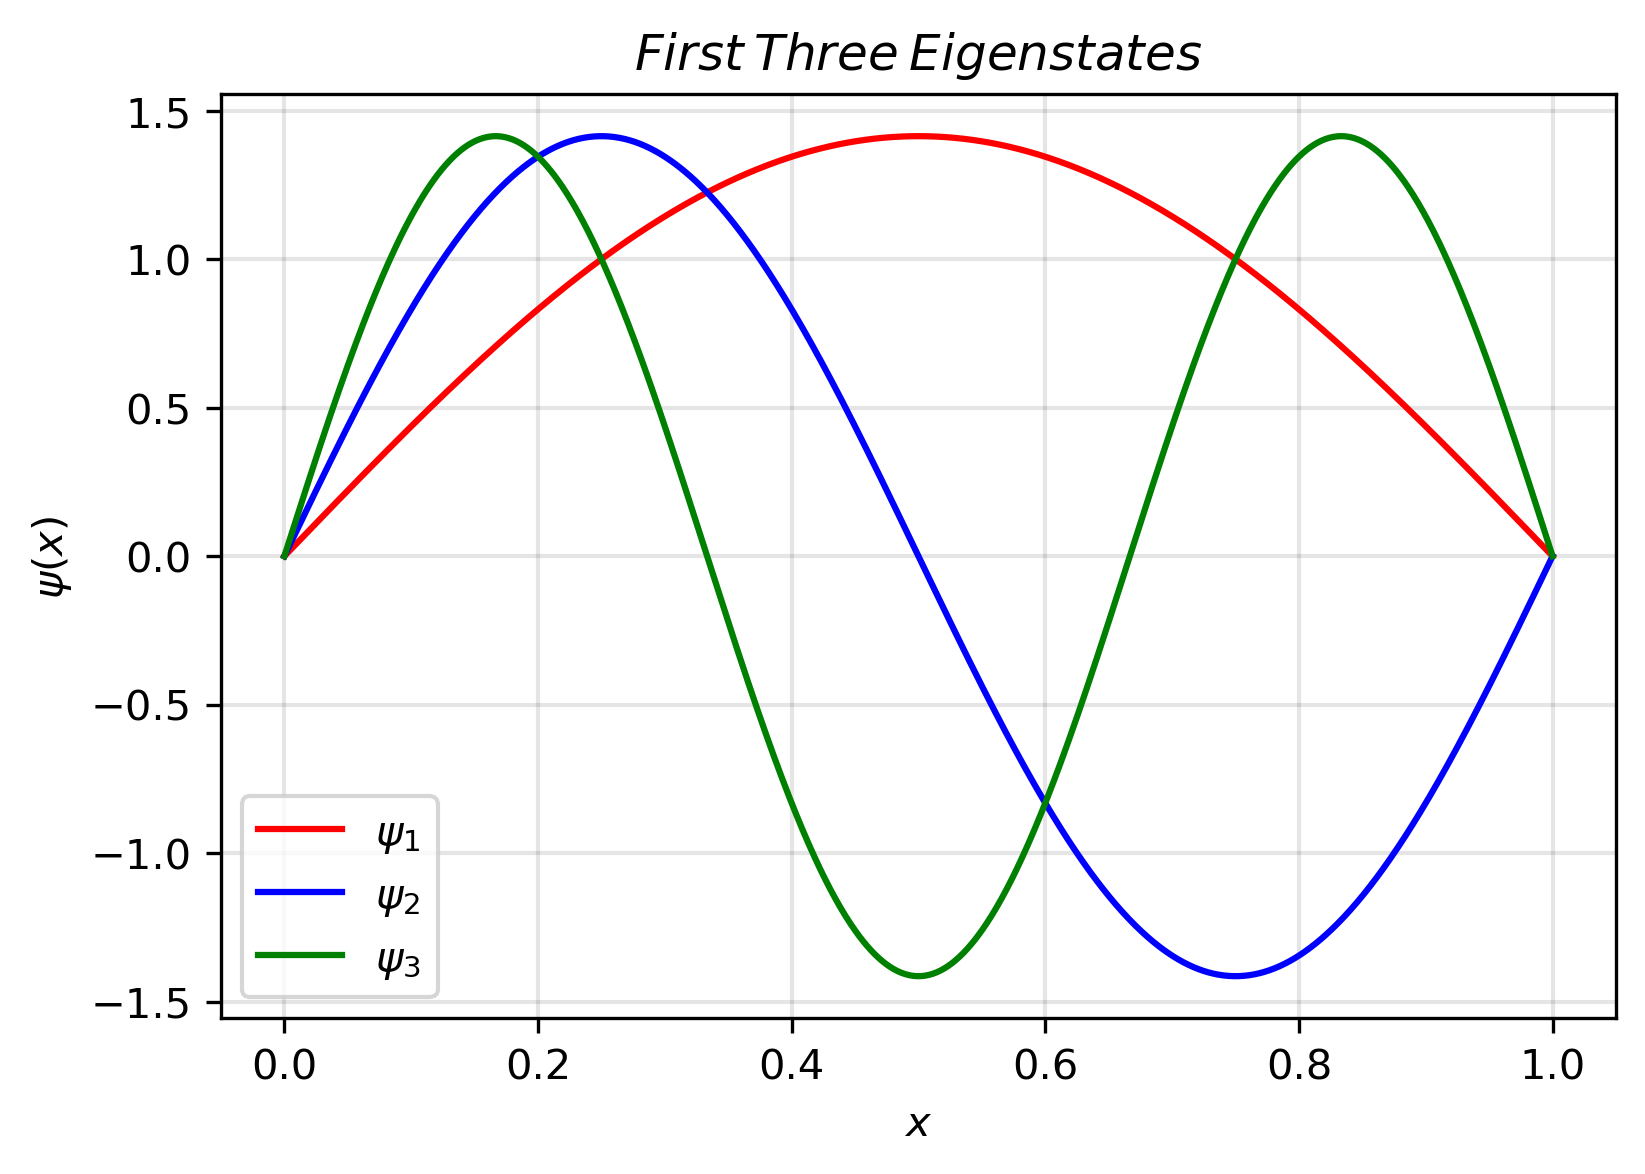

In [48]:
#Calculating psi values
psi_1=psi_n(1,x,L=1)
psi_2=psi_n(2,x,L=1)
psi_3=psi_n(3,x,L=1)
#Plotting
fig,axes=plt.subplots(figsize=(6,4), dpi=300)
axes.plot(x,psi_1,label=r"$\psi_{1}$",color="r",linestyle='-')
axes.plot(x,psi_2,label=r"$\psi_{2}$",color="b",linestyle='-')
axes.plot(x,psi_3,label=r"$\psi_{3}$",color="g",linestyle='-')
axes.set_title(r"$First \: Three \: Eigenstates$")
axes.set_xlabel(r"$x$")
axes.set_ylabel(r"$\psi(x)$")
axes.grid(True,which='both', linestyle='-',alpha=0.1,linewidth=1,color='black')
axes.legend()

Οι ανωτέρω γραφικές παραστάσεις σκιαγραφούν δύο θεμελιώδη θεωρητικώς αναμενόμενα χαρακτηριστικά των ιδιοκαταστάσεων του προβλήματος: αρχικά, η κυματοσυνάρτηση $\psi_{n}(x)$ παρουσιάζει $(n-1)$ κόμβους, εκτός των άκρων. Πράγματι, η $\psi_{1}$ δεν έχει κόμβους, η $\psi_{2}$ έχει έναν κόμβο και η $\psi_{3}$ έχει δύο. Κατά δεύτερον, οι ιδιοκαταστάσεις περιττού $n$ είναι άρτιες συναρτήσεις του $x$ ως προς το κέντρο του πηγαδιού, ενώ αντίστοιχα οι ιδιοκαταστάσεις άρτιου $n$ είναι περιττές συναρτήσεις του $x$, κάτι το οποίο φυσικά επιβεβαιώνει το σχήμα.

**β)** Οι αντίστοιχες ιδιοενέργειες υπολογίζονται εύκολα από τη συνάρτηση που ορίσαμε:

In [51]:
en_1=E_n(1,L=1)
en_2=E_n(2,L=1)
en_3=E_n(3,L=1)
print(f"Energy of first (ground) eigenstate:{en_1}")
print(f"Energy of second (first excited) eigenstate:{en_2}")
print(f"Energy of third (second excited) eigenstate:{en_3}")

Energy of first (ground) eigenstate:4.934802200544679
Energy of second (first excited) eigenstate:19.739208802178716
Energy of third (second excited) eigenstate:44.41321980490211


Εύκολα μπορεί να ελεγχθεί ότι οι ενέργειες πληρούν τη σχέση $E_{n}=n^{2}E_{1}$.

**γ)** Ουσιαστικά θα προγραμματίσουμε τον υπολογισμό του ολοκληρώματος: $$P(0\leq x \leq L/2)=\int_{0}^{L/2} |\psi_{1}(x)|^{2} \,dx $$ για την κυματοσυνάρτηση: $$\psi_{1}=\sqrt2\sin(\pi x) \: (n=1)$$

In [54]:
def psi_1sq(x):
    return abs(psi_n(1,x,L=1)**2)
res,err=quad(psi_1sq,0,L/2) #We're using the quad method.

print(f"The probability of the particle being in the space interval [0,L/2] is {res}")

The probability of the particle being in the space interval [0,L/2] is 0.5000000000000001


Όπως ήταν φυσικώς αναμενόμενο λόγω της συμμετρίας του προβλήματος, η πιθανότητηα το σωματίδιο να βρεθεί στο αριστερό μισό του φρέατος είναι ακριβώς 0.5 (50%).

##  Ερώτηση 2: Χρονική Εξέλιξη Κυματοσυνάρτησης
**(α)** Θεωρώντας την αρχική κατάσταση: $\Psi(x,0) = \frac{1}{\sqrt{2}} (\psi_1 + \psi_2)$, οπου  $\psi_1$ , $\psi_2$ οι παραπάνω ιδιοσυναρτήσεις, να
υπολογίσετε και να σχεδιάστε την $|\Psi(x,t)|^2$ για 4 τιμές t (**times = [0, 1, 2, 3, 4]**) στο ίδιο διάγραμμα. Τι παρατηρείτε; Εξηγήστε το λόγο.



**α)** Ο τελεστής χρονικής εξέλιξης ορίζεται ως εξής:   $$\hat{U}=e^{-i\hat{H}t/\hbar}$$ και δρώντας στην κυματοσυνάρτηση: $$\hat{U}\ket{\Psi(x,0)}=\ket{\Psi(x,t)}=\frac{1}{\sqrt2}(\hat{U}\ket{\psi_{1}}+\hat{U}\ket{\psi_{2}})=\frac{1}{\sqrt2}(e^{-iE_{1}t/\hbar}\ket{\psi_{1}}+e^{-iE_{2}t/\hbar}\ket{\psi_{2}}),$$ την οποία και θα προγραμματίσουμε.


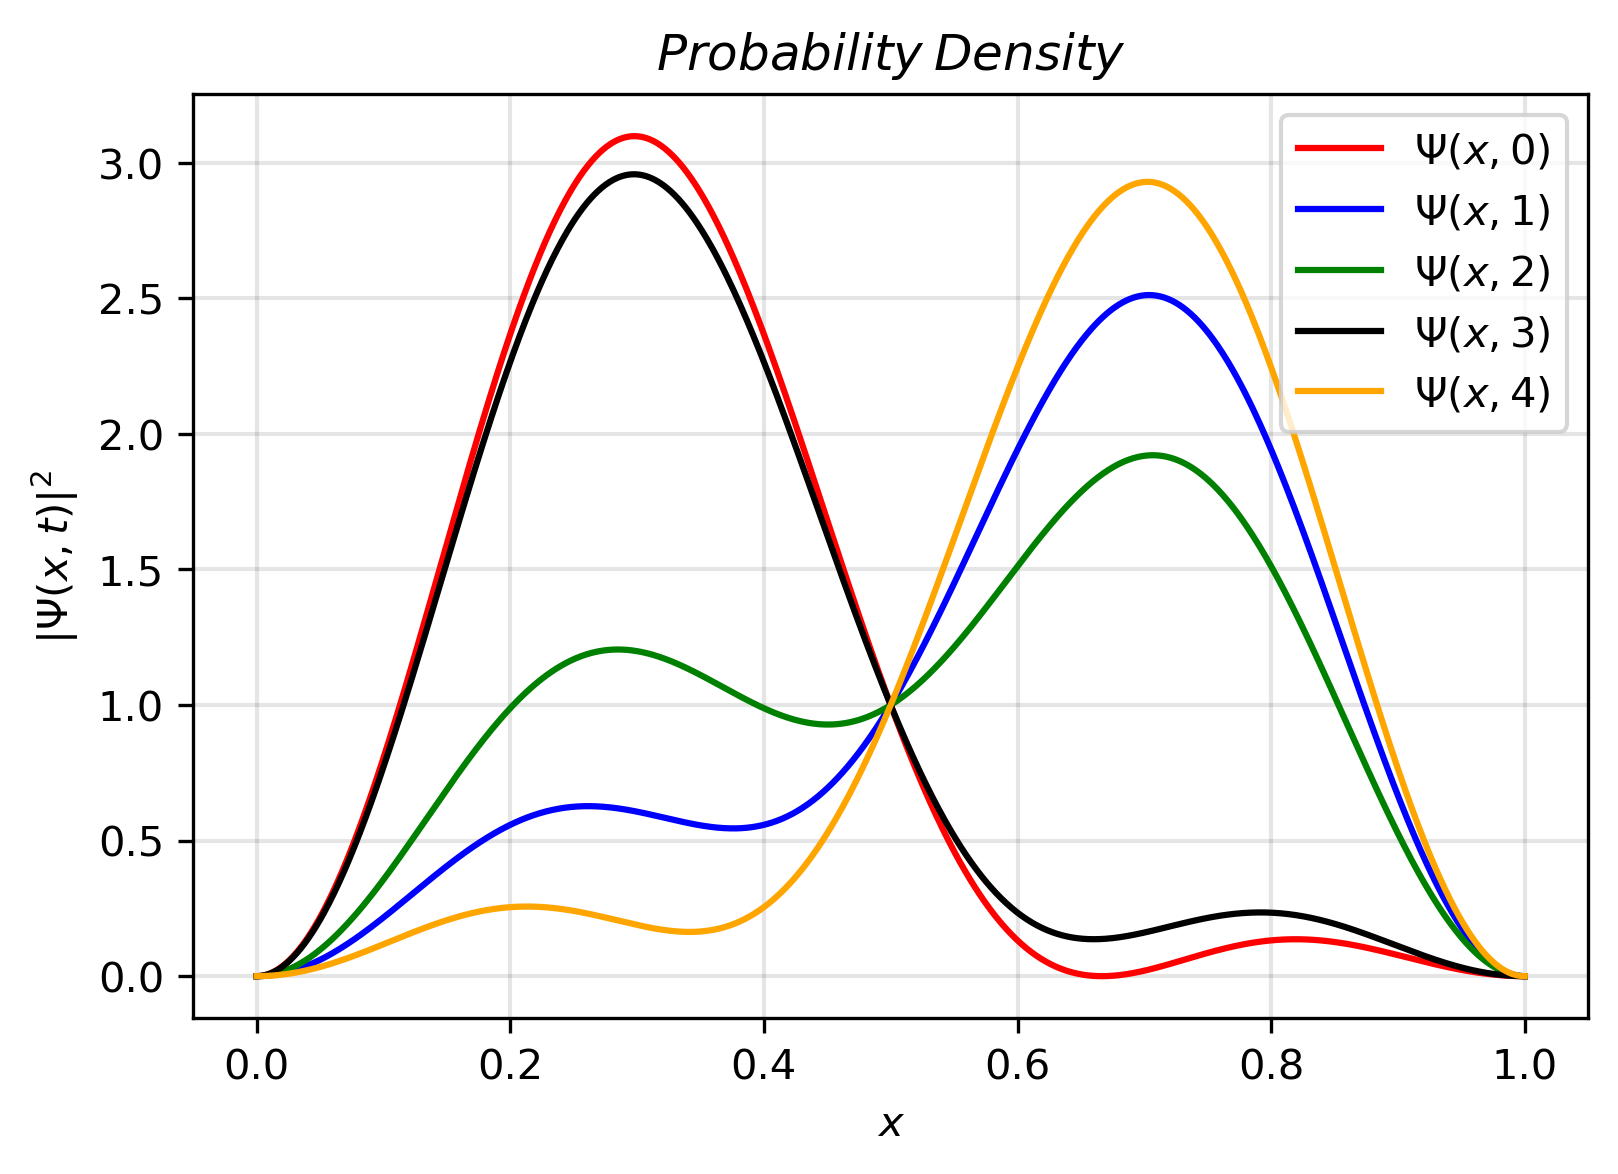

In [58]:
def psi1(x):
    #We define the wavefunction psi_1
    return psi_n(1,x,L=1)
def psi2(x):
    #We define the wavefunction psi_2
    return psi_n(2,x,L=1)
def psi_t(x,t):
    #Psi(x,t) function
    return 1/np.sqrt(2)*(np.exp(-1j*en_1*t/hbar)*psi1(x)+np.exp(-1j*en_2*t/hbar)*psi2(x))

#Probability densities
prob_psi0=np.real(np.conj(psi_t(x,0))*psi_t(x,0)) #t=0
prob_psi1=np.real(np.conj(psi_t(x,1))*psi_t(x,1)) #t=1
prob_psi2=np.real(np.conj(psi_t(x,2))*psi_t(x,2)) #t=2
prob_psi3=np.real(np.conj(psi_t(x,3))*psi_t(x,3)) #t=3
prob_psi4=np.real(np.conj(psi_t(x,4))*psi_t(x,4)) #t=4

#Plotting
fig1,axes1=plt.subplots(figsize=(6,4),dpi=300)
axes1.plot(x,prob_psi0,label=r"$\Psi(x,0)$",color="r")
axes1.plot(x,prob_psi1,label=r"$\Psi(x,1)$",color="b")
axes1.plot(x,prob_psi2,label=r"$\Psi(x,2)$",color="g")
axes1.plot(x,prob_psi3,label=r"$\Psi(x,3)$",color="black")
axes1.plot(x,prob_psi4,label=r"$\Psi(x,4)$",color="orange")
axes1.set_title(r"$Probability \: Density$")
axes1.set_xlabel(r"$x$")
axes1.set_ylabel(r"$|\Psi(x,t)|^{2}$")
axes1.grid(True,which='both', linestyle='-',alpha=0.1,linewidth=1,color='black')
axes1.legend()

Εδώ έχουμε την περίπτωση συμβολής (υπέρθεσης) δύο ιδιοκαταστάσεων. Το σωματίδιο δεν βρίσκεται σε στάσιμη κατάσταση, και άρα η πιθανότητα να βρεθεί σε κάποιο σημείο του φρέατος μεταβάλλεται με τον χρόνο. Λόγω του όρου συμβολής, η πυκνότητα πιθανότητας παρουσιάζει ταλαντώσεις σχηματίζοντας τους δύο "λόφους". Καθώς ο χρόνος μεταβάλλεται, οι όροι θα συμβάλλουν είτε εποικοδομητικά είτε καταστρεπτικά. Άλλοτε είναι πιο πιθανό να βρεθεί στο αριστερό μισό (π.χ. κόκκινη ή μαύρη καμπύλη), άλλοτε στο δεξί μισό (μπλέ ή πορτοκαλί καμπύλη), και άλλοτε είναι εξίσου πιθανό να βρεθεί είτε στο πρώτο μισό είτε στο δεύτερο (ποιοτικά αυτό αναπαριστά η πράσινη καμπύλη).

Η συμβολή προκύπτει λόγω του τετραγώνου της $\ket{\Psi(x,t)}$, δηλαδή: $$\ket{\Psi(x,t)}^{2}=\frac{1}{2}(\ket{\psi_{1}(x)}^{2}+\ket{\psi_{2}(x)}^{2}+2\psi_{1}\psi_{2}\cos(\omega t))$$ όπου ορίσαμε $\omega=(E_{2}-E_{1})/\hbar$ και χρησιμοποιήσαμε τον τύπο του Euler. Επιπλέον, εκμεταλλευτήκαμε το γεγονός ότι οι ιδιοκαταστάσεις εν προκειμένω είναι πραγματικές συναρτήσεις.

## Ερώτηση 3: Αβεβαιότητα Θέσης
**(α)** Υπολογίστε τη μέση τιμή $\langle x \rangle$ και την αβεβαιότητα $ Δx =\sqrt{\langle x^2 \rangle - \langle x \rangle^2}$ για 6 ομοιόμορφα κατανεμημένες τιμές στο διάστημα από 0 έως 4π  (**for t in np.linspace(0, 4*np.pi, 6)**) για την $\Psi(x,t)$

**(β)** Για  $\Psi=ψ_1(x,t)$ τι αποτελέσματα βγαίνουν για τους ίδιους χρόνους; Πώς εξηγουνται;

**α)** Το πρόγραμμα για τον υπολογισμό της αναμενόμενης θέσης και της αβεβαιότητας στη θέση:

In [62]:
tval=np.linspace(0,4*np.pi,6)
x_values=[] #We create lists to store the x and Δx values
dx_values=[] 
for t in tval:
    def xmeanvaluefun(x):
        #Calculates the <x> function.
        psi=psi_t(x,t)
        return np.real(np.conj(psi)*x*psi)
    def xsqmeanvaluefun(x):
        #Calculates the <x^2> function.
        psi=psi_t(x,t)
        return np.real(np.conj(psi)*x**2*psi)
    xmean,err1=quad(xmeanvaluefun,0,L) #Integration to get the mean value
    xsqmean,err2=quad(xsqmeanvaluefun,0,L) #Likewise
    ascertainty=np.sqrt(xsqmean-xmean**2) #The ascertainty
    dx_values.append(ascertainty)
    x_values.append(xmean)

print(f"The calculated position ascertainty values are : {dx_values}")
print(f"The calculated expectation position values are : {x_values}")

The calculated position ascertainty values are : [0.13865384920525556, 0.1626463453569586, 0.20420129259099293, 0.22665394423144508, 0.21645773110476754, 0.17936142189392937]
The calculated expectation position values are : [0.31987345130251066, 0.34120255106857766, 0.4001386183288532, 0.4827242074152364, 0.5694011101501906, 0.6396421991422748]


Παρατηρούμε επομένως ότι και οι δυό ποσότητες μεταβάλλονται με το χρόνο.

**β)** Αντίστοιχα, για την περίπτωση όπου $\Psi=ψ_1(x,t)$:

In [65]:
def psi1_t(x,t):
     return psi_n(1,x,L=1)*np.exp(-1j*en_1*t/hbar)
x1_values=[]
dx1_values=[]
for t in tval:
    def x1mfv(x):
        #Calculates the <x> function.
        psi=psi1_t(x,t)
        return np.real(np.conj(psi)*x*psi)
    def x1sqmvf(x):
        #Calculates the <x^2> function.
        psi=psi1_t(x,t)
        return np.real(np.conj(psi)*x**2*psi)
    x1mean,err1=quad(x1mfv,0,L) #Integration to get the mean value
    x1sqmean,err2=quad(x1sqmvf,0,L) 
    ascertainty=np.sqrt(x1sqmean-x1mean**2) #The ascertainty
    dx1_values.append(ascertainty)
    x1_values.append(xmean)

print(f"The calculated position ascertainty values for psi_1 are: {dx1_values}")
print(f"The calculated expectation position values for psi_1 are: {x1_values}")

The calculated position ascertainty values for psi_1 are: [0.18075602759566378, 0.18075602759566411, 0.18075602759566411, 0.18075602759566395, 0.18075602759566378, 0.18075602759566378]
The calculated expectation position values for psi_1 are: [0.6396421991422748, 0.6396421991422748, 0.6396421991422748, 0.6396421991422748, 0.6396421991422748, 0.6396421991422748]


Φυσικά, αυτό που προκύπτει στη δεύτερη περίπτωση και είναι αναμενόμενο, είναι ότι τόσο η αναμενόμενη θέση $\langle x \rangle$ όσο και η αβεβαιότητα $\Delta x$ παραμένουν σταθερές με το χρόνο. Σε αντίθεση με πριν, εδώ δεν έχουμε υπέρθεση κυματοσυναρτήσεων, αλλά μια στάσιμη κατάσταση, την $\psi_{1}$. Αυτό συνεπάγεται άμεσα ότι όλες οι παρατηρήσιμες ποσότητες είναι ανεξάρτητες του χρόνου, όπως επιβεβαιώνουν και οι υπολογισμοί μας. Η τελευταία παρατήρηση σχετίζεται με το γεγονός ότι οι υπολογισμοί των παρατηρήσιμων μεγεθών σχετίζονται με το $|\Psi(x,t)|^{2}$, και τότε οι εκθετικοί όροι που εισάγουν τον χρόνο αναιρούνται, δηλαδή ο χρόνος απαλείφεται. Η μόνη ποσότητα που εξελίσσεται με το χρόνο, τελικά, είναι η ίδια η $\Psi(x,t)$, η οποία, ωστόσο, από μόνη της, δεν έχει φυσικό περιεχόμενο.